<Figure size 1400x600 with 0 Axes>

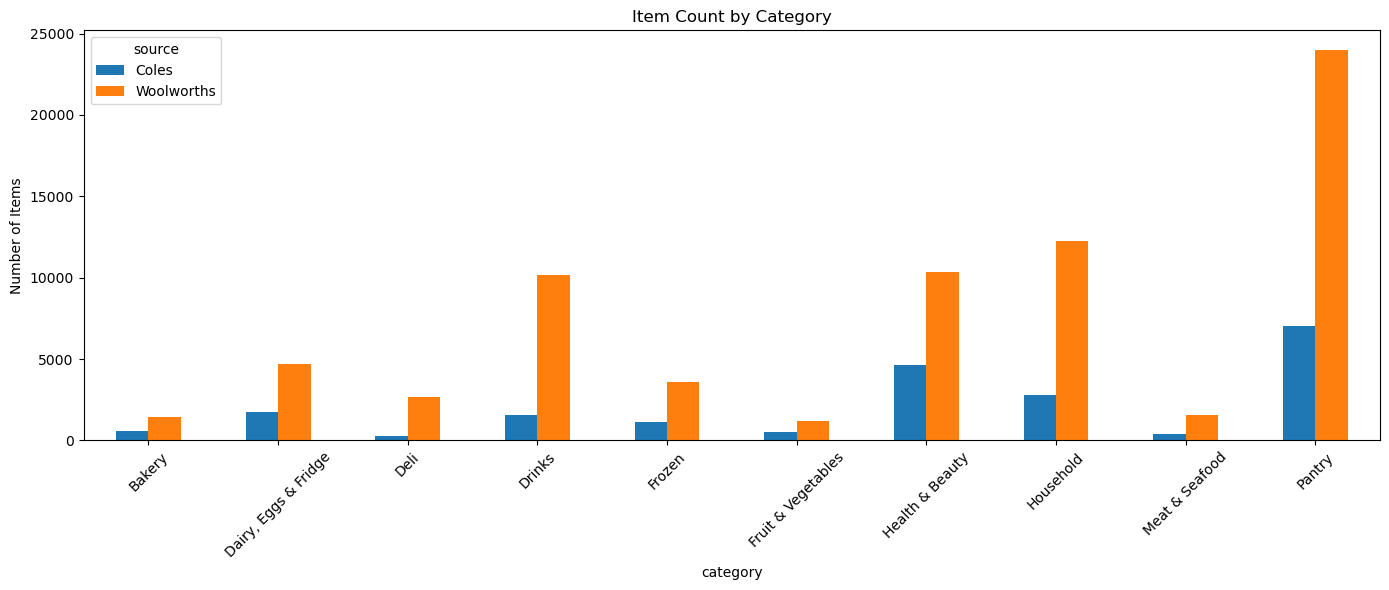

<Figure size 1400x600 with 0 Axes>

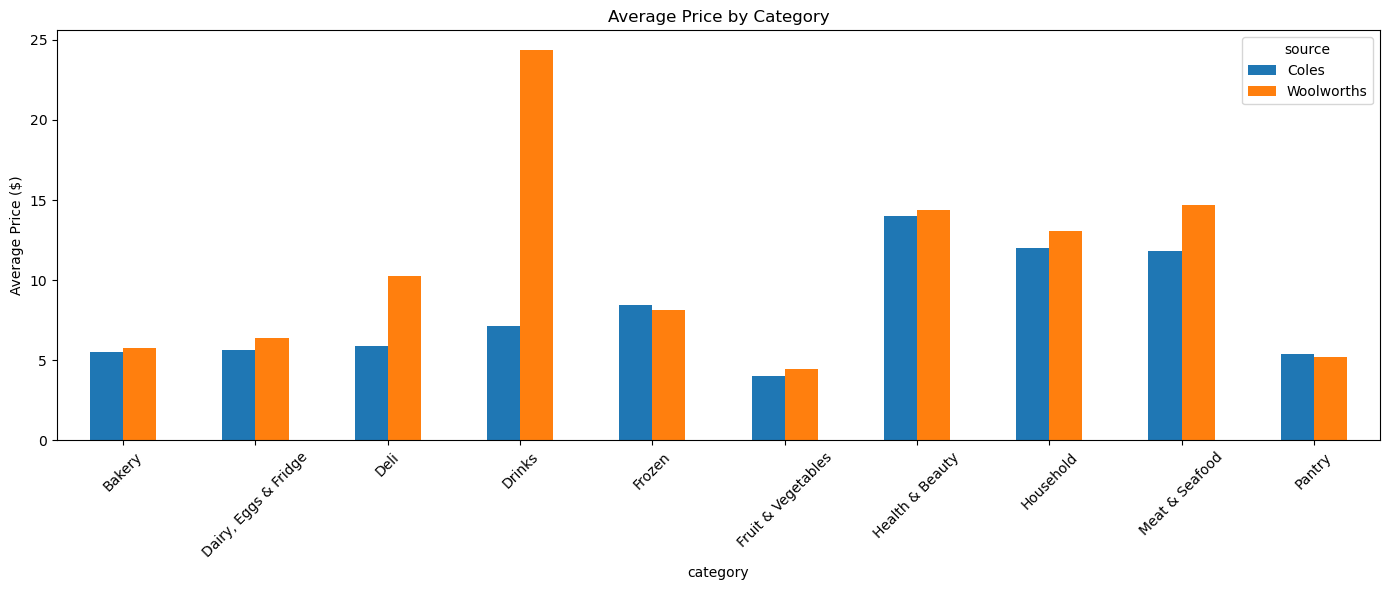

<Figure size 1400x600 with 0 Axes>

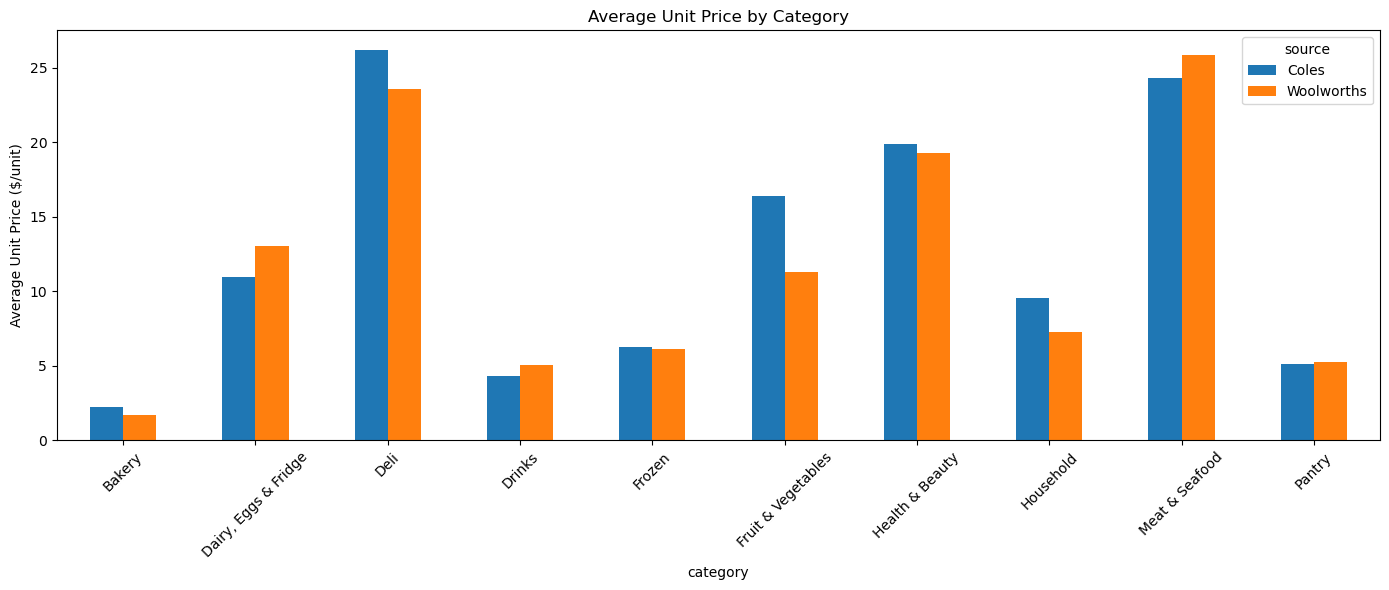

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


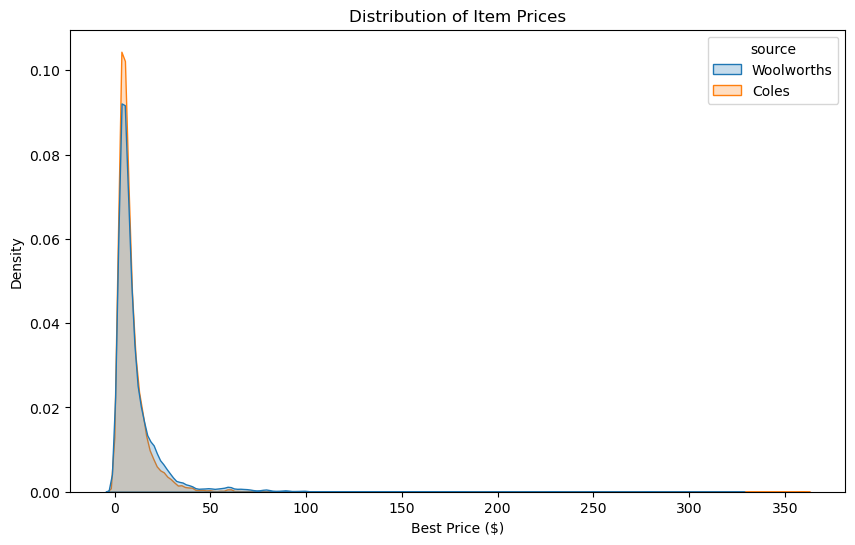

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (if not already loaded)
woolworths_df = pd.read_excel("Updated Woolworths Dataset.xlsx")
coles_df = pd.read_excel("Coles Dataset.xlsx")

# Add a source column
woolworths_df['source'] = 'Woolworths'
coles_df['source'] = 'Coles'

# Standardize category columns for grouping
combined_df = pd.concat([woolworths_df, coles_df], ignore_index=True)

# Basic group analysis by category and source
category_summary = combined_df.groupby(['category', 'source']).agg({
    'item_name': 'count',
    'best_price': 'mean',
    'best_unit_price': 'mean'
}).reset_index()

category_summary.rename(columns={
    'item_name': 'item_count',
    'best_price': 'avg_price',
    'best_unit_price': 'avg_unit_price'
}, inplace=True)

# Pivot table for comparison
pivot_count = category_summary.pivot(index='category', columns='source', values='item_count').fillna(0)
pivot_price = category_summary.pivot(index='category', columns='source', values='avg_price').fillna(0)
pivot_unit_price = category_summary.pivot(index='category', columns='source', values='avg_unit_price').fillna(0)

# Plotting
plt.figure(figsize=(14, 6))
pivot_count.plot(kind='bar', title='Item Count by Category', figsize=(14, 6), rot=45)
plt.ylabel('Number of Items')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
pivot_price.plot(kind='bar', title='Average Price by Category', figsize=(14, 6), rot=45)
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
pivot_unit_price.plot(kind='bar', title='Average Unit Price by Category', figsize=(14, 6), rot=45)
plt.ylabel('Average Unit Price ($/unit)')
plt.tight_layout()
plt.show()

# Optional: Distribution of prices
plt.figure(figsize=(10, 6))
sns.kdeplot(data=combined_df, x='best_price', hue='source', common_norm=False, fill=True)
plt.title("Distribution of Item Prices")
plt.xlabel("Best Price ($)")
plt.show()
